<a href="https://colab.research.google.com/github/CHIN-HUA/AI/blob/main/%E6%BD%AE%E6%B0%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

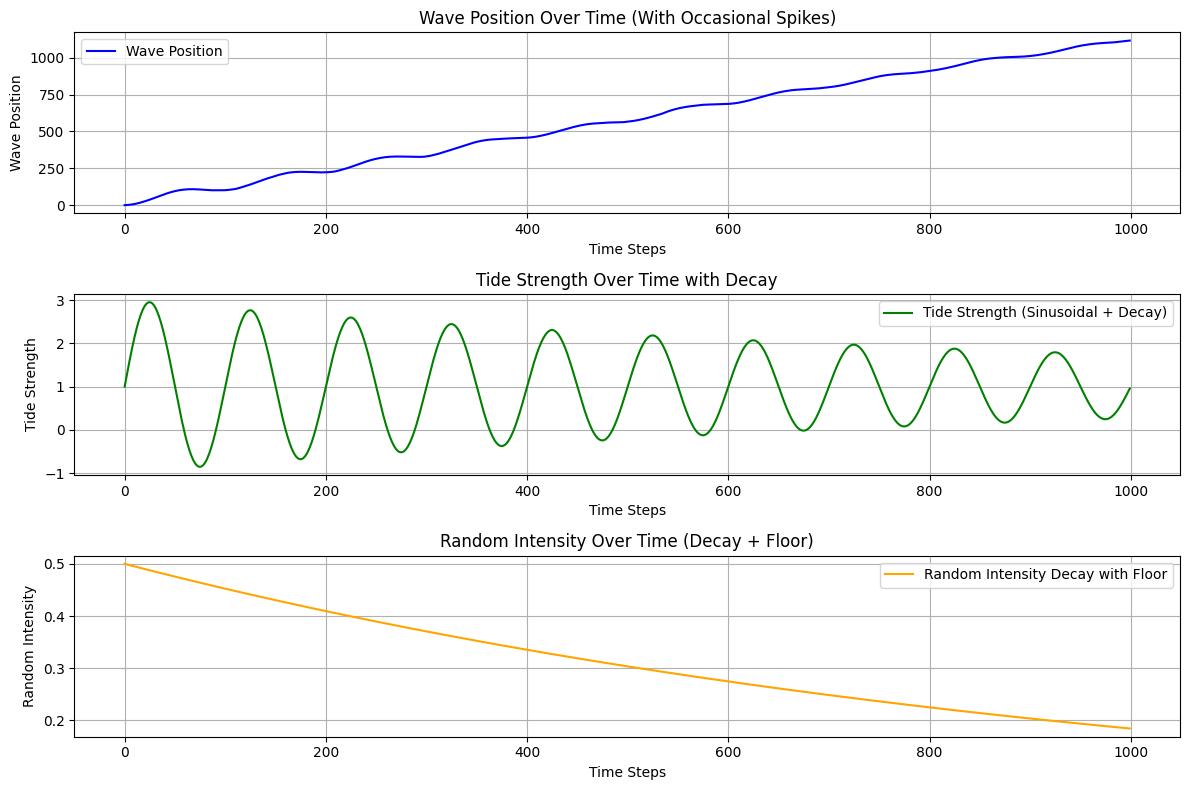

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
time_steps = 1000  # Number of simulation steps
eta = 0.1          # Learning rate (wave propagation rate)
beta = 0.9         # Momentum parameter (wave inertia)
A_tide_0 = 2.0     # Initial tide amplitude
T_base = 1.0       # Base tide value
tide_period = 100  # Tide period (in steps)
lambda_decay = 0.001  # Decay rate for tide amplitude
random_intensity_0 = 0.5  # Initial random perturbation intensity
random_floor = 0.1        # Minimum random intensity (to avoid full decay)

# Initialization
positions = []  # Wave position records
momentum = 0    # Initial momentum
position = 0    # Initial wave position

# Simulation loop
for t in range(time_steps):
    # Calculate decaying tide amplitude
    A_tide = A_tide_0 * np.exp(-lambda_decay * t)
    random_intensity = max(random_intensity_0 * np.exp(-lambda_decay * t), random_floor)  # Randomness decay with floor

    # Calculate tide effect with decay
    tide_effect = T_base + A_tide * np.sin(2 * np.pi * t / tide_period)

    # Random perturbation with occasional large spikes
    random_effect = np.random.randn() * random_intensity + np.random.choice([0, 5], p=[0.98, 0.02])  # 2% chance for spike

    # Momentum update
    gradient = tide_effect + random_effect  # Gradient composed of tide and randomness
    momentum = beta * momentum + eta * gradient
    position += momentum  # Update wave position

    # Record data
    positions.append(position)

# Visualization
plt.figure(figsize=(12, 8))
time = np.arange(time_steps)

# Wave position plot
plt.subplot(3, 1, 1)
plt.plot(time, positions, label="Wave Position", color='blue')
plt.title("Wave Position Over Time (With Occasional Spikes)")
plt.xlabel("Time Steps")
plt.ylabel("Wave Position")
plt.grid()
plt.legend()

# Tide strength plot
tide_strength = T_base + (A_tide_0 * np.exp(-lambda_decay * time)) * np.sin(2 * np.pi * time / tide_period)
plt.subplot(3, 1, 2)
plt.plot(time, tide_strength, label="Tide Strength (Sinusoidal + Decay)", color='green')
plt.title("Tide Strength Over Time with Decay")
plt.xlabel("Time Steps")
plt.ylabel("Tide Strength")
plt.grid()
plt.legend()

# Randomness decay plot
random_decay = np.maximum(random_intensity_0 * np.exp(-lambda_decay * time), random_floor)
plt.subplot(3, 1, 3)
plt.plot(time, random_decay, label="Random Intensity Decay with Floor", color='orange')
plt.title("Random Intensity Over Time (Decay + Floor)")
plt.xlabel("Time Steps")
plt.ylabel("Random Intensity")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


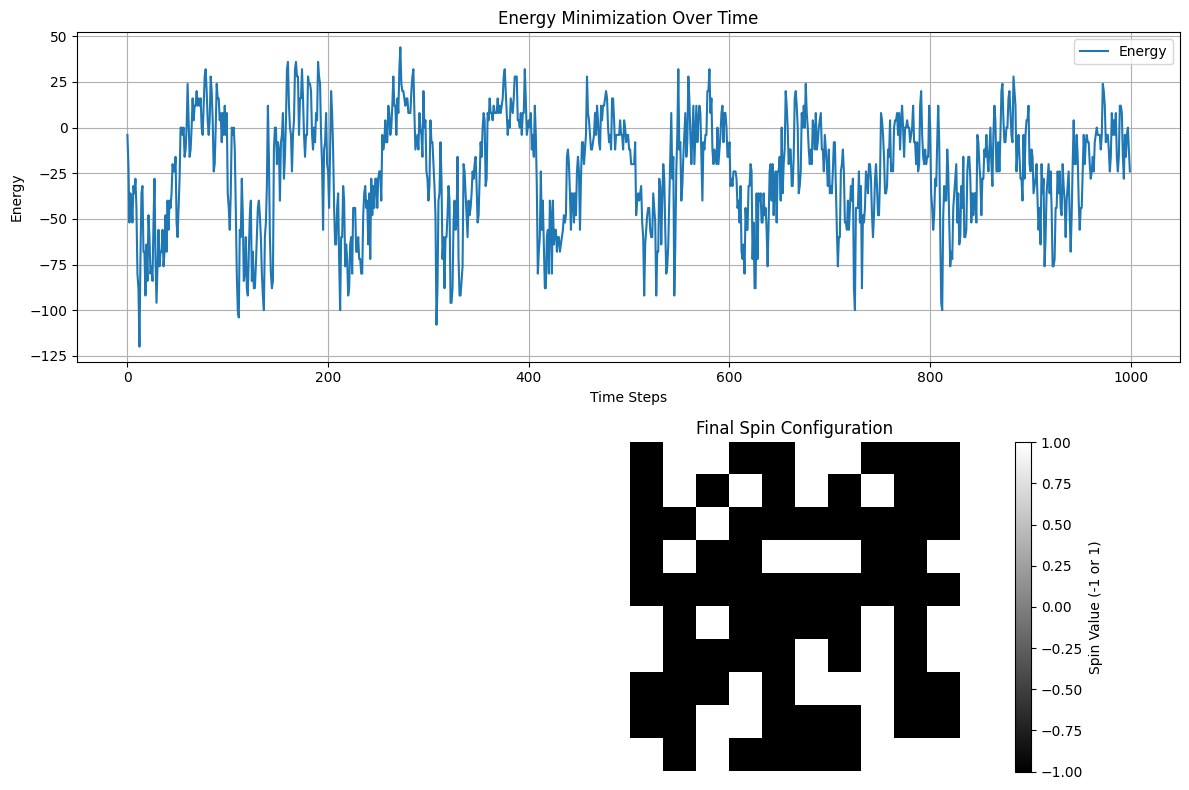

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ising model parameters
L = 10  # Lattice size (10x10 grid)
J = 1   # Interaction strength
h = 0   # External magnetic field

# Simulation parameters
time_steps = 1000  # Number of simulation steps
eta = 0.1          # Learning rate (wave propagation rate)
beta = 0.9         # Momentum parameter (wave inertia)
A_tide_0 = 2.0     # Initial tide amplitude
T_base = 1.0       # Base tide value
tide_period = 100  # Tide period (in steps)
lambda_decay = 0.001  # Decay rate for tide amplitude
random_intensity_0 = 0.5  # Initial random perturbation intensity
random_floor = 0.1        # Minimum random intensity (to avoid full decay)

# Initialization
np.random.seed(42)
spins = np.random.choice([-1, 1], size=(L, L))  # Random initial spin configuration
momentum = np.zeros_like(spins, dtype=float)  # Initial momentum for each spin

# Energy function
def ising_energy(spins, J, h):
    energy = 0
    L = spins.shape[0]
    for i in range(L):
        for j in range(L):
            # Interaction with neighbors (periodic boundary conditions)
            energy -= J * spins[i, j] * (spins[(i+1) % L, j] + spins[i, (j+1) % L])
            energy -= h * spins[i, j]  # External field contribution
    return energy

# Simulation loop
energies = []  # Record energy over time
for t in range(time_steps):
    # Calculate decaying tide amplitude
    A_tide = A_tide_0 * np.exp(-lambda_decay * t)
    random_intensity = max(random_intensity_0 * np.exp(-lambda_decay * t), random_floor)

    # Calculate tide effect with decay
    tide_effect = T_base + A_tide * np.sin(2 * np.pi * t / tide_period)

    # Random perturbation with occasional large spikes
    random_effect = np.random.randn(*spins.shape) * random_intensity + \
                    np.random.choice([0, 5], size=spins.shape, p=[0.98, 0.02])  # 2% chance for spike

    # Energy gradient (spin flip effect)
    L = spins.shape[0]
    gradient = np.zeros_like(spins, dtype=float)
    for i in range(L):
        for j in range(L):
            neighbor_sum = spins[(i+1) % L, j] + spins[(i-1) % L, j] + spins[i, (j+1) % L] + spins[i, (j-1) % L]
            gradient[i, j] = -2 * spins[i, j] * (J * neighbor_sum + h)  # Gradient w.r.t flipping

    # Add tide and random effects
    gradient += tide_effect + random_effect

    # Momentum update
    momentum = beta * momentum + eta * gradient
    spins = np.sign(spins - momentum)  # Update spins based on momentum

    # Record energy
    energy = ising_energy(spins, J, h)
    energies.append(energy)

# Visualization
plt.figure(figsize=(12, 8))

# Energy plot
plt.subplot(2, 1, 1)
plt.plot(range(time_steps), energies, label="Energy")
plt.title("Energy Minimization Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Energy")
plt.grid()
plt.legend()

# Final spin configuration
plt.subplot(2, 1, 2)
plt.imshow(spins, cmap='gray', interpolation='none')
plt.title("Final Spin Configuration")
plt.colorbar(label="Spin Value (-1 or 1)")
plt.axis("off")

plt.tight_layout()
plt.show()


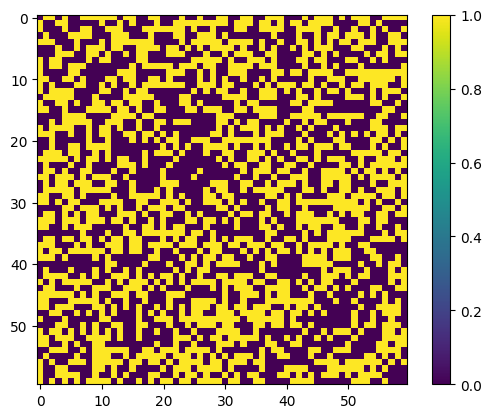

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
adjMat = np.load("adjMat.npy")     # load example Max-Cut problem
plt.imshow(adjMat)
plt.colorbar()

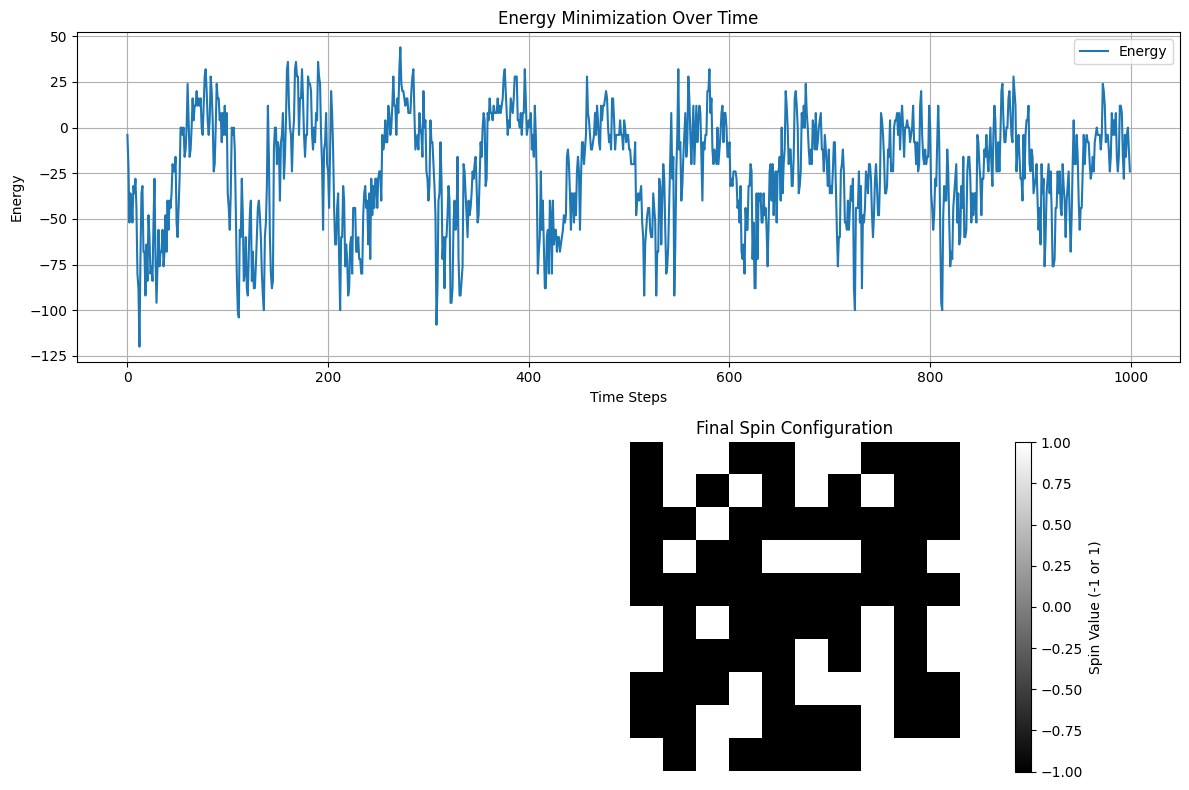

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ising model parameters
L = 10  # Lattice size (10x10 grid)
J = 1   # Interaction strength
h = 0   # External magnetic field

# Simulation parameters
time_steps = 1000  # Number of simulation steps
eta = 0.1          # Learning rate (wave propagation rate)
beta = 0.9         # Momentum parameter (wave inertia)
A_tide_0 = 2.0     # Initial tide amplitude
T_base = 1.0       # Base tide value
tide_period = 100  # Tide period (in steps)
lambda_decay = 0.001  # Decay rate for tide amplitude
random_intensity_0 = 0.5  # Initial random perturbation intensity
random_floor = 0.1        # Minimum random intensity (to avoid full decay)

# Initialization
np.random.seed(42)
spins = np.random.choice([-1, 1], size=(L, L))  # Random initial spin configuration
momentum = np.zeros_like(spins, dtype=float)  # Initial momentum for each spin

# Energy function
def ising_energy(spins, J, h):
    energy = 0
    L = spins.shape[0]
    for i in range(L):
        for j in range(L):
            # Interaction with neighbors (periodic boundary conditions)
            energy -= J * spins[i, j] * (spins[(i+1) % L, j] + spins[i, (j+1) % L])
            energy -= h * spins[i, j]  # External field contribution
    return energy

# Simulation loop
energies = []  # Record energy over time
for t in range(time_steps):
    # Calculate decaying tide amplitude
    A_tide = A_tide_0 * np.exp(-lambda_decay * t)
    random_intensity = max(random_intensity_0 * np.exp(-lambda_decay * t), random_floor)

    # Calculate tide effect with decay
    tide_effect = T_base + A_tide * np.sin(2 * np.pi * t / tide_period)

    # Random perturbation with occasional large spikes
    random_effect = np.random.randn(*spins.shape) * random_intensity + \
                    np.random.choice([0, 5], size=spins.shape, p=[0.98, 0.02])  # 2% chance for spike

    # Energy gradient (spin flip effect)
    L = spins.shape[0]
    gradient = np.zeros_like(spins, dtype=float)
    for i in range(L):
        for j in range(L):
            neighbor_sum = spins[(i+1) % L, j] + spins[(i-1) % L, j] + spins[i, (j+1) % L] + spins[i, (j-1) % L]
            gradient[i, j] = -2 * spins[i, j] * (J * neighbor_sum + h)  # Gradient w.r.t flipping

    # Add tide and random effects
    gradient += tide_effect + random_effect

    # Momentum update
    momentum = beta * momentum + eta * gradient
    spins = np.sign(spins - momentum)  # Update spins based on momentum

    # Record energy
    energy = ising_energy(spins, J, h)
    energies.append(energy)

# Visualization
plt.figure(figsize=(12, 8))

# Energy plot
plt.subplot(2, 1, 1)
plt.plot(range(time_steps), energies, label="Energy")
plt.title("Energy Minimization Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Energy")
plt.grid()
plt.legend()

# Final spin configuration
plt.subplot(2, 1, 2)
plt.imshow(spins, cmap='gray', interpolation='none')
plt.title("Final Spin Configuration")
plt.colorbar(label="Spin Value (-1 or 1)")
plt.axis("off")

plt.tight_layout()
plt.show()


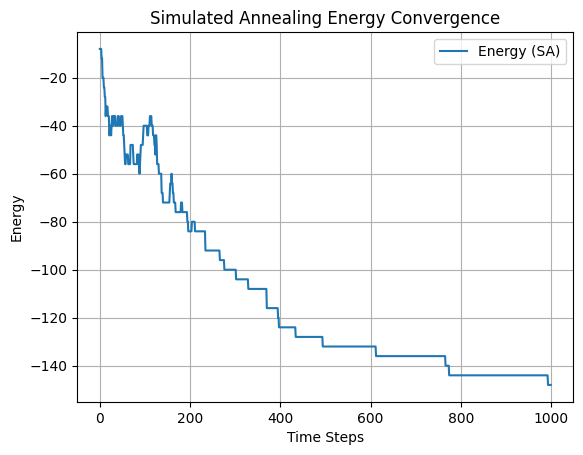

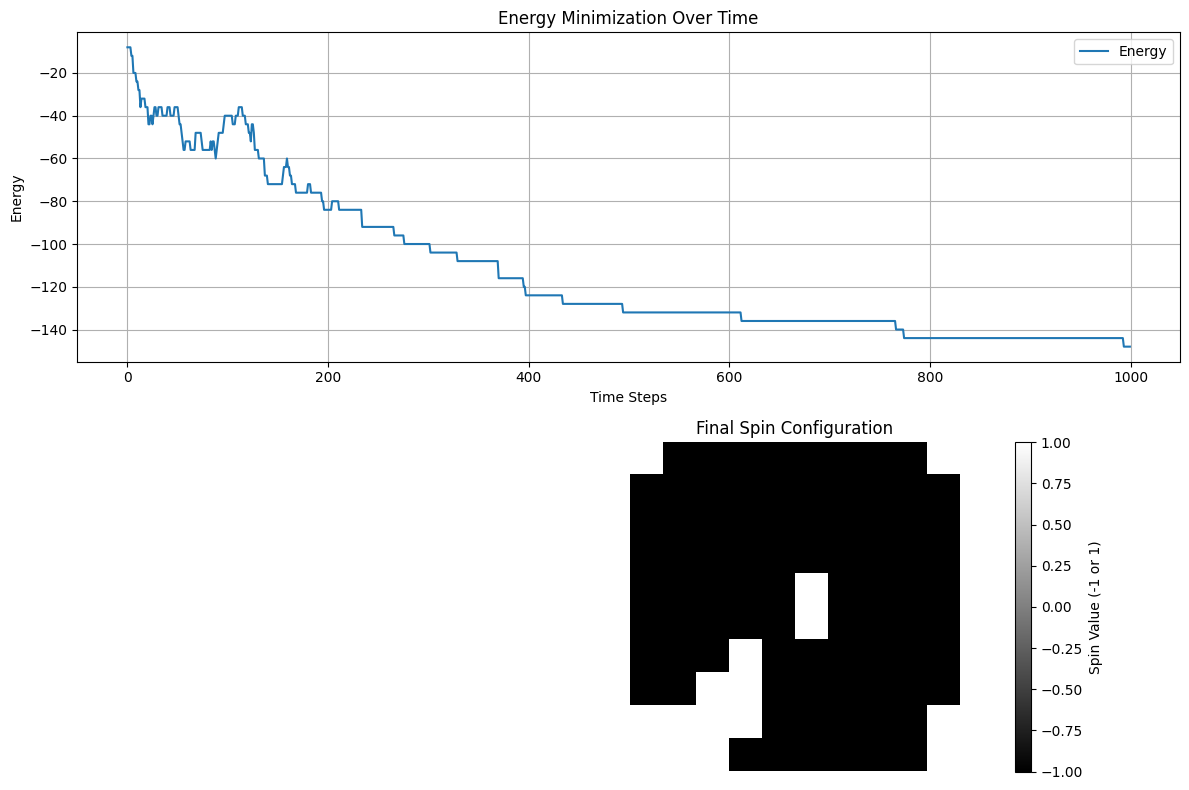

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ising model parameters
L = 10
J = 1
h = 0

# SA parameters
time_steps = 1000
T_initial = 10.0
T_final = 0.1
alpha = 0.99  # Cooling rate

# Initial configuration
np.random.seed(42)
spins = np.random.choice([-1, 1], size=(L, L))

# Energy function
def ising_energy(spins, J, h):
    energy = 0
    for i in range(L):
        for j in range(L):
            energy -= J * spins[i, j] * (spins[(i+1)%L, j] + spins[i, (j+1)%L])
            energy -= h * spins[i, j]
    return energy

# Simulated annealing
energies = []
T = T_initial
for t in range(time_steps):
    i, j = np.random.randint(0, L, size=2)  # Random spin to flip
    delta_E = 2 * J * spins[i, j] * (spins[(i+1)%L, j] + spins[(i-1)%L, j] + spins[i, (j+1)%L] + spins[i, (j-1)%L])
    delta_E += 2 * h * spins[i, j]

    if delta_E < 0 or np.random.rand() < np.exp(-delta_E / T):
        spins[i, j] *= -1  # Accept the flip

    energies.append(ising_energy(spins, J, h))
    T = max(T_final, T * alpha)  # Cool down

# Plot energy
plt.plot(energies, label="Energy (SA)")
plt.xlabel("Time Steps")
plt.ylabel("Energy")
plt.legend()
plt.title("Simulated Annealing Energy Convergence")
plt.grid()
plt.show()

#####
# Visualization
plt.figure(figsize=(12, 8))

# Energy plot
plt.subplot(2, 1, 1)
plt.plot(range(time_steps), energies, label="Energy")
plt.title("Energy Minimization Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Energy")
plt.grid()
plt.legend()

# Final spin configuration
plt.subplot(2, 1, 2)
plt.imshow(spins, cmap='gray', interpolation='none')
plt.title("Final Spin Configuration")
plt.colorbar(label="Spin Value (-1 or 1)")
plt.axis("off")

plt.tight_layout()
plt.show()



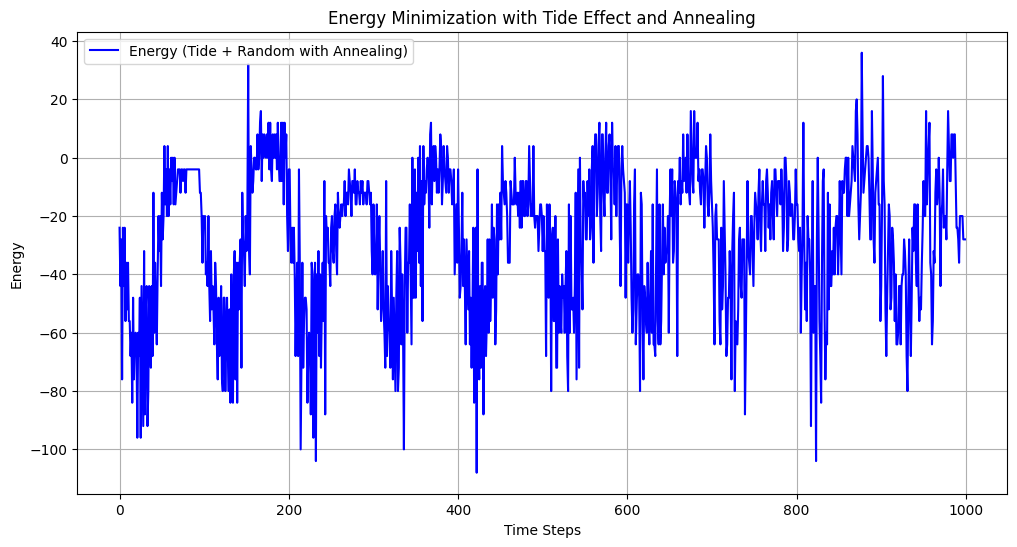

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ising model parameters
L = 10  # Lattice size (10x10 grid)
J = 1   # Interaction strength
h = 0   # External magnetic field

# Simulation parameters
time_steps = 1000
beta = 0.9  # Momentum parameter
A_tide_0 = 2.0  # Initial tide amplitude
T_base = 1.0  # Base tide value
tide_period = 100  # Tide period
lambda_decay = 0.001  # Decay rate for tide amplitude
random_intensity_0 = 0.5  # Initial random perturbation intensity
random_floor = 0.1  # Minimum random intensity

# Retarget learning rate like simulated annealing
eta_initial = 1.0
eta_final = 0.01

# Initialization
np.random.seed(42)
spins = np.random.choice([-1, 1], size=(L, L))  # Random initial spin configuration
momentum = np.zeros_like(spins, dtype=float)

# Energy function
def ising_energy(spins, J, h):
    energy = 0
    for i in range(L):
        for j in range(L):
            energy -= J * spins[i, j] * (spins[(i+1) % L, j] + spins[i, (j+1) % L])
            energy -= h * spins[i, j]
    return energy

# Simulation loop
energies = []
for t in range(time_steps):
    # Calculate decaying tide amplitude
    A_tide = A_tide_0 * np.exp(-lambda_decay * t)
    random_intensity = max(random_intensity_0 * np.exp(-lambda_decay * t), random_floor)
    tide_effect = T_base + A_tide * np.sin(2 * np.pi * t / tide_period)
    random_effect = np.random.randn(*spins.shape) * random_intensity + \
                    np.random.choice([0, 5], size=spins.shape, p=[0.98, 0.02])  # 2% chance for spike

    # Energy gradient
    gradient = np.zeros_like(spins, dtype=float)
    for i in range(L):
        for j in range(L):
            neighbor_sum = spins[(i+1) % L, j] + spins[(i-1) % L, j] + spins[i, (j+1) % L] + spins[i, (j-1) % L]
            gradient[i, j] = -2 * spins[i, j] * (J * neighbor_sum + h)

    # Add tide and random effects
    gradient += tide_effect + random_effect

    # Annealed learning rate
    eta = eta_initial * (1 - t / time_steps) + eta_final * (t / time_steps)

    # Momentum update
    momentum = beta * momentum + eta * gradient
    spins = np.sign(spins - momentum)

    # Record energy
    energy = ising_energy(spins, J, h)
    energies.append(energy)

# Visualization
plt.figure(figsize=(12, 6))

# Energy plot
plt.plot(energies, label="Energy (Tide + Random with Annealing)", color='blue')
plt.title("Energy Minimization with Tide Effect and Annealing")
plt.xlabel("Time Steps")
plt.ylabel("Energy")
plt.legend()
plt.grid()

plt.show()


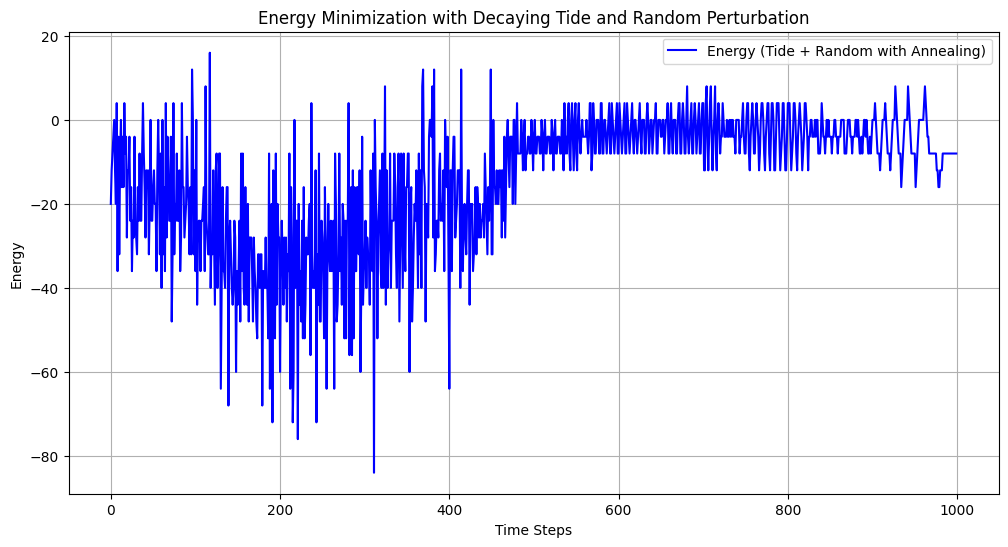

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ising model parameters
L = 10  # Lattice size (10x10 grid)
J = 1   # Interaction strength
h = 0   # External magnetic field

# Simulation parameters
time_steps = 1000
beta = 0.9  # Momentum parameter
A_tide_0 = 2.0  # Initial tide amplitude
random_intensity_0 = 0.5  # Initial random perturbation intensity
random_floor = 0.1  # Minimum random intensity

# Retarget learning rate and decay similar to simulated annealing
eta_initial = 1.0
eta_final = 0.01

# Initialization
np.random.seed(42)
spins = np.random.choice([-1, 1], size=(L, L))  # Random initial spin configuration
momentum = np.zeros_like(spins, dtype=float)

# Energy function
def ising_energy(spins, J, h):
    energy = 0
    for i in range(L):
        for j in range(L):
            energy -= J * spins[i, j] * (spins[(i+1) % L, j] + spins[i, (j+1) % L])
            energy -= h * spins[i, j]
    return energy

# Simulation loop
energies = []
for t in range(time_steps):
    # Annealing process for tide amplitude and random intensity
    A_tide = A_tide_0 * (1 - t / time_steps)  # Tide amplitude decreases linearly
    random_intensity = max(random_intensity_0 * (1 - t / time_steps), random_floor)  # Randomness decays linearly

    # Tide effect with decay
    tide_effect = A_tide * np.sin(2 * np.pi * t / time_steps)

    # Random perturbation with gradual decay
    random_effect = np.random.randn(*spins.shape) * random_intensity

    # Energy gradient
    gradient = np.zeros_like(spins, dtype=float)
    for i in range(L):
        for j in range(L):
            neighbor_sum = spins[(i+1) % L, j] + spins[(i-1) % L, j] + spins[i, (j+1) % L] + spins[i, (j-1) % L]
            gradient[i, j] = -2 * spins[i, j] * (J * neighbor_sum + h)

    # Add tide and random effects
    gradient += tide_effect + random_effect

    # Annealed learning rate
    eta = eta_initial * (1 - t / time_steps) + eta_final * (t / time_steps)

    # Momentum update
    momentum = beta * momentum + eta * gradient
    spins = np.sign(spins - momentum)

    # Record energy
    energy = ising_energy(spins, J, h)
    energies.append(energy)

# Visualization
plt.figure(figsize=(12, 6))

# Energy plot
plt.plot(energies, label="Energy (Tide + Random with Annealing)", color='blue')
plt.title("Energy Minimization with Decaying Tide and Random Perturbation")
plt.xlabel("Time Steps")
plt.ylabel("Energy")
plt.legend()
plt.grid()

plt.show()


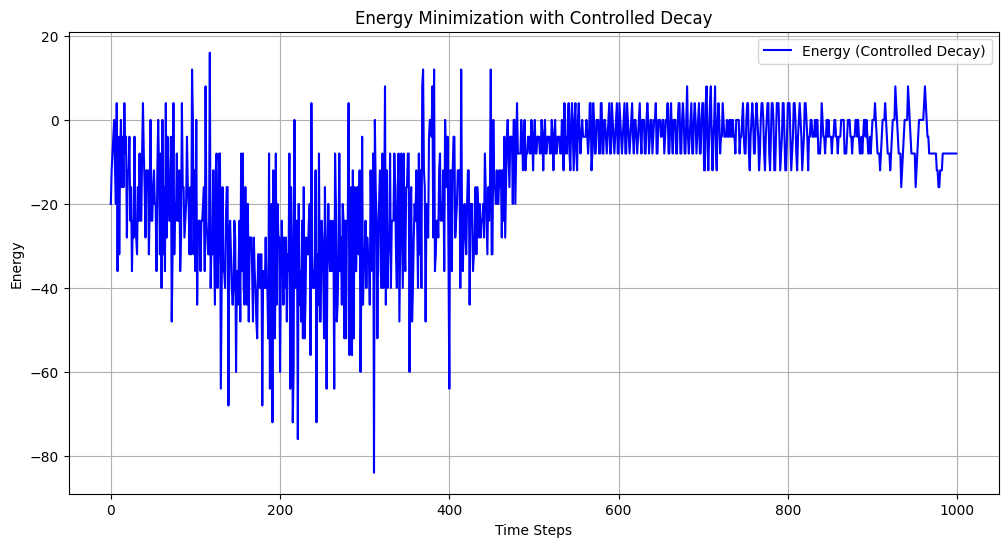

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ising model parameters
L = 10  # Lattice size (10x10 grid)
J = 1   # Interaction strength
h = 0   # External magnetic field

# Simulation parameters
time_steps = 1000
beta = 0.9  # Momentum parameter
A_tide_0 = 2.0  # Initial tide amplitude
random_intensity_0 = 0.5  # Initial random perturbation intensity
random_floor = 0.1  # Minimum random intensity

# Retarget learning rate and decay similar to simulated annealing
eta_initial = 1.0
eta_final = 0.01

# Initialization
np.random.seed(42)
spins = np.random.choice([-1, 1], size=(L, L))  # Random initial spin configuration
momentum = np.zeros_like(spins, dtype=float)

# Energy function
def ising_energy(spins, J, h):
    energy = 0
    for i in range(L):
        for j in range(L):
            energy -= J * spins[i, j] * (spins[(i+1) % L, j] + spins[i, (j+1) % L])
            energy -= h * spins[i, j]
    return energy

# Simulation loop
energies = []
for t in range(time_steps):
    # Energy-based decay for tide amplitude and random intensity
    energy = ising_energy(spins, J, h)
    A_tide = max(A_tide_0 * (1 - t / time_steps), 0)  # Tide amplitude decreases linearly
    random_intensity = max(random_intensity_0 * (1 - t / time_steps), random_floor)  # Randomness decays linearly

    # Tide effect with decay
    tide_effect = A_tide * np.sin(2 * np.pi * t / time_steps)

    # Random perturbation with gradual decay
    random_effect = np.random.randn(*spins.shape) * random_intensity

    # Energy gradient
    gradient = np.zeros_like(spins, dtype=float)
    for i in range(L):
        for j in range(L):
            neighbor_sum = spins[(i+1) % L, j] + spins[(i-1) % L, j] + spins[i, (j+1) % L] + spins[i, (j-1) % L]
            gradient[i, j] = -2 * spins[i, j] * (J * neighbor_sum + h)

    # Add tide and random effects
    gradient += tide_effect + random_effect

    # Annealed learning rate
    eta = eta_initial * (1 - t / time_steps) + eta_final * (t / time_steps)

    # Momentum update
    momentum = beta * momentum + eta * gradient
    spins = np.sign(spins - momentum)

    # Record energy
    energy = ising_energy(spins, J, h)
    energies.append(energy)

# Visualization
plt.figure(figsize=(12, 6))

# Energy plot
plt.plot(energies, label="Energy (Controlled Decay)", color='blue')
plt.title("Energy Minimization with Controlled Decay")
plt.xlabel("Time Steps")
plt.ylabel("Energy")
plt.legend()
plt.grid()

plt.show()


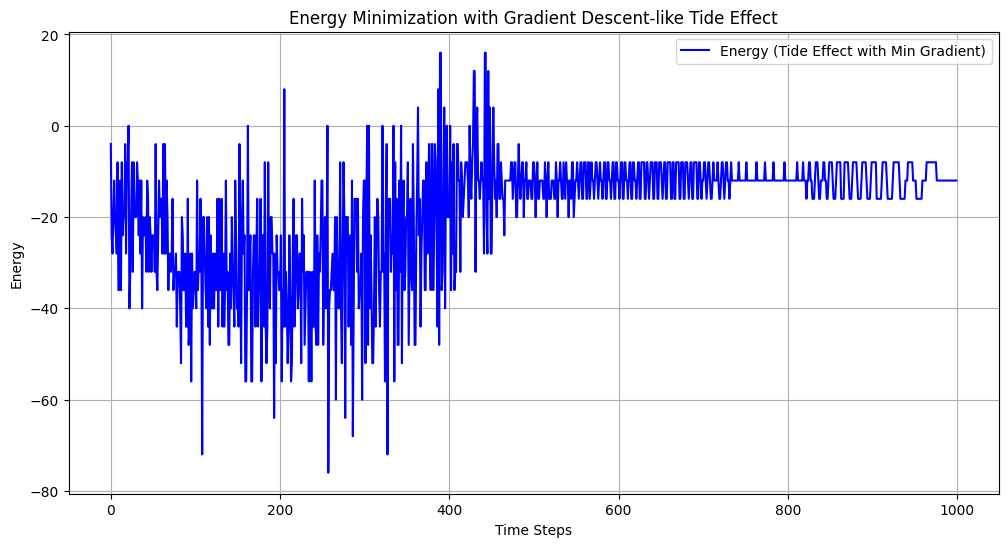

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ising model parameters
L = 10  # Lattice size (10x10 grid)
J = 1   # Interaction strength
h = 0   # External magnetic field

# Simulation parameters
time_steps = 1000
n_update = 10  # Number of steps before recalculating gradient minimum
beta = 0.9  # Momentum parameter
A_tide_0 = 2.0  # Initial tide amplitude
random_intensity_0 = 0.5  # Initial random perturbation intensity
random_floor = 0.1  # Minimum random intensity

# Retarget learning rate and decay
eta_initial = 1.0
eta_final = 0.01

# Initialization
np.random.seed(42)
spins = np.random.choice([-1, 1], size=(L, L))  # Random initial spin configuration
momentum = np.zeros_like(spins, dtype=float)

# Energy function
def ising_energy(spins, J, h):
    energy = 0
    for i in range(L):
        for j in range(L):
            energy -= J * spins[i, j] * (spins[(i+1) % L, j] + spins[i, (j+1) % L])
            energy -= h * spins[i, j]
    return energy

# Simulation loop
energies = []
for t in range(time_steps):
    # Update tide amplitude and random intensity
    A_tide = A_tide_0 * (1 - t / time_steps)
    random_intensity = max(random_intensity_0 * (1 - t / time_steps), random_floor)

    # Tide effect with decay
    tide_effect = A_tide * np.sin(2 * np.pi * t / time_steps)

    # Random perturbation with gradual decay
    random_effect = np.random.randn(*spins.shape) * random_intensity

    # Energy gradient calculation
    gradient = np.zeros_like(spins, dtype=float)
    for i in range(L):
        for j in range(L):
            neighbor_sum = spins[(i+1) % L, j] + spins[(i-1) % L, j] + spins[i, (j+1) % L] + spins[i, (j-1) % L]
            gradient[i, j] = -2 * spins[i, j] * (J * neighbor_sum + h)

    # Add tide and random effects
    gradient += tide_effect + random_effect

    # Find minimum energy direction every n_update steps
    if t % n_update == 0:
        min_idx = np.unravel_index(np.argmin(gradient), gradient.shape)  # Index of minimum gradient
        gradient *= 0  # Zero out all gradients
        gradient[min_idx] = -1  # Set gradient at minimum energy direction

    # Annealed learning rate
    eta = eta_initial * (1 - t / time_steps) + eta_final * (t / time_steps)

    # Momentum update
    momentum = beta * momentum + eta * gradient
    spins = np.sign(spins - momentum)

    # Record energy
    energy = ising_energy(spins, J, h)
    energies.append(energy)

# Visualization
plt.figure(figsize=(12, 6))

# Energy plot
plt.plot(energies, label="Energy (Tide Effect with Min Gradient)", color='blue')
plt.title("Energy Minimization with Gradient Descent-like Tide Effect")
plt.xlabel("Time Steps")
plt.ylabel("Energy")
plt.legend()
plt.grid()

plt.show()


In [ ]:
coulpingMatrix = - adjMat   # Covert problem to Ising coupling
# parameter chosing
numTrials = 100
numIterations = 1000   # predefined number of iterations
numSpins = coulpingMatrix.shape[0]  # number of spins (Problem size N)
adpRate = 0.01    # learning rate/step size
lamda = np.linspace(10,0,numIterations)     # coefficient of initial Hamiltonian
# initilization
spinVector = np.random.randint(2,size=(numSpins,numTrials))*2-1.0   # randomly initialize spin configurations
xVector = np.zeros((numSpins,numTrials))    # zero initialize classical "superposition"
momentum = np.zeros((numSpins,numTrials))    # zero initialize momentum
isingHamil = np.zeros(numTrials)    # Ising Hamiltonian
isingHamilHistory = np.zeros((numIterations,numTrials))     # Ising Hamiltonian History

In [ ]:
# Run simulation with tidal effect
for ii in np.arange(numIterations):
    # Calculate system contributions
    delHising = np.dot(-coulpingMatrix, spinVector)  # Contribution from Ising interaction
    delHinit = xVector  # Initial state contribution

    # Add tidal effect
    tide_amplitude = 2.0 * (1 - ii / numIterations)  # Tidal amplitude decays linearly
    tide_effect = tide_amplitude * np.sin(2 * np.pi * ii / 100)  # Periodic tide effect
    delHsystem = delHising + lamda[ii] * delHinit + tide_effect  # Total system effect

    # Update momentum
    momentum = (1 - adpRate) * momentum - adpRate * delHsystem
    momentum = np.clip(momentum, -1, 1)  # Clip momentum

    # Update state
    xVector += momentum  # Update classical "superposition"
    xVector = np.clip(xVector, -1, 1)  # Clip classical "superposition"
    spinVector = np.sign(xVector)  # Update spin state

    # Calculate Ising Hamiltonian
    for tt in np.arange(numTrials):
        isingHamil[tt] = -0.5 * np.dot(spinVector[:, tt].T, (coulpingMatrix @ spinVector[:, tt]))

    # Record energy history
    isingHamilHistory[ii] = isingHamil


(-200.0, 200.0)

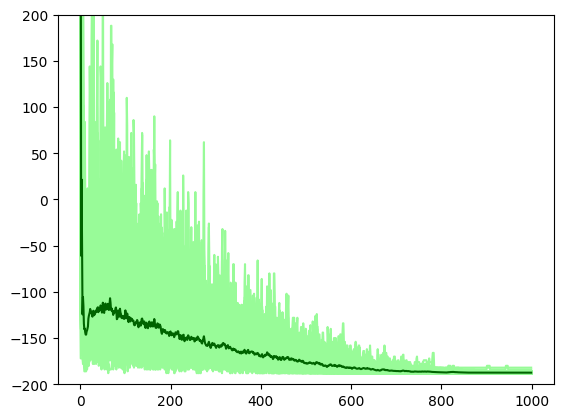

In [ ]:
for tt in np.arange(numTrials):
    plt.plot(isingHamilHistory[:,tt], color = 'palegreen')
plt.plot(np.mean(isingHamilHistory,axis=1), color='darkgreen')
plt.ylim(-200,200)

In [ ]:
coulpingMatrix = - adjMat   # Covert problem to Ising coupling
# parameter chosing
numTrials = 100
numIterations = 1000   # predefined number of iterations
numSpins = coulpingMatrix.shape[0]  # number of spins (Problem size N)
adpRate = 0.01    # learning rate/step size
lamda = np.linspace(10,0,numIterations)     # coefficient of initial Hamiltonian
# initilization
spinVector = np.random.randint(2,size=(numSpins,numTrials))*2-1.0   # randomly initialize spin configurations
xVector = np.zeros((numSpins,numTrials))    # zero initialize classical "superposition"
momentum = np.zeros((numSpins,numTrials))    # zero initialize momentum
isingHamil = np.zeros(numTrials)    # Ising Hamiltonian
isingHamilHistory = np.zeros((numIterations,numTrials))     # Ising Hamiltonian History

In [ ]:
# run
for ii in np.arange(numIterations):
    delHising = np.dot(-coulpingMatrix, spinVector)     # can be implemented experimentally by memristor crossbar array
    delHinit = xVector
    delHsystem = delHising + lamda[ii]*delHinit
    momentum = (1-adpRate)*momentum - adpRate*delHsystem    # update momentum
    momentum = np.clip(momentum,-1,1)   # clip momentum
    xVector += momentum     # update classical "superposition"
    xVector = np.clip(xVector,-1,1 )    # clip classical "superposition"
    spinVector = np.sign(xVector)
    for tt in np.arange(numTrials):
        isingHamil[tt] = - 0.5*np.dot(spinVector[:,tt].T, (coulpingMatrix @ spinVector[:,tt]))      # calculate Ising Hamiltonian
    isingHamilHistory[ii] = isingHamil      # energy tracking

(-200.0, 200.0)

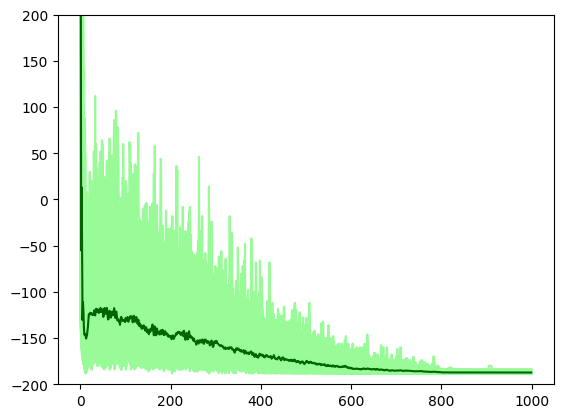

In [ ]:
for tt in np.arange(numTrials):
    plt.plot(isingHamilHistory[:,tt], color = 'palegreen')
plt.plot(np.mean(isingHamilHistory,axis=1), color='darkgreen')
plt.ylim(-200,200)

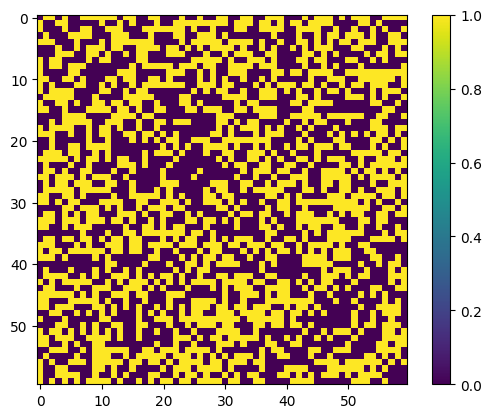

In [ ]:
adjMat = np.load("adjMat.npy")     # load example Max-Cut problem
plt.imshow(adjMat)
plt.colorbar()

In [ ]:
coulpingMatrix = - adjMat   # Covert problem to Ising coupling
# parameter chosing
numTrials = 100
numIterations = 1000   # predefined number of iterations
numSpins = coulpingMatrix.shape[0]  # number of spins (Problem size N)
adpRate = 0.01    # learning rate/step size
lamda = np.linspace(10,0,numIterations)     # coefficient of initial Hamiltonian
# initilization
spinVector = np.random.randint(2,size=(numSpins,numTrials))*2-1.0   # randomly initialize spin configurations
xVector = np.zeros((numSpins,numTrials))    # zero initialize classical "superposition"
momentum = np.zeros((numSpins,numTrials))    # zero initialize momentum
isingHamil = np.zeros(numTrials)    # Ising Hamiltonian
isingHamilHistory = np.zeros((numIterations,numTrials))     # Ising Hamiltonian History

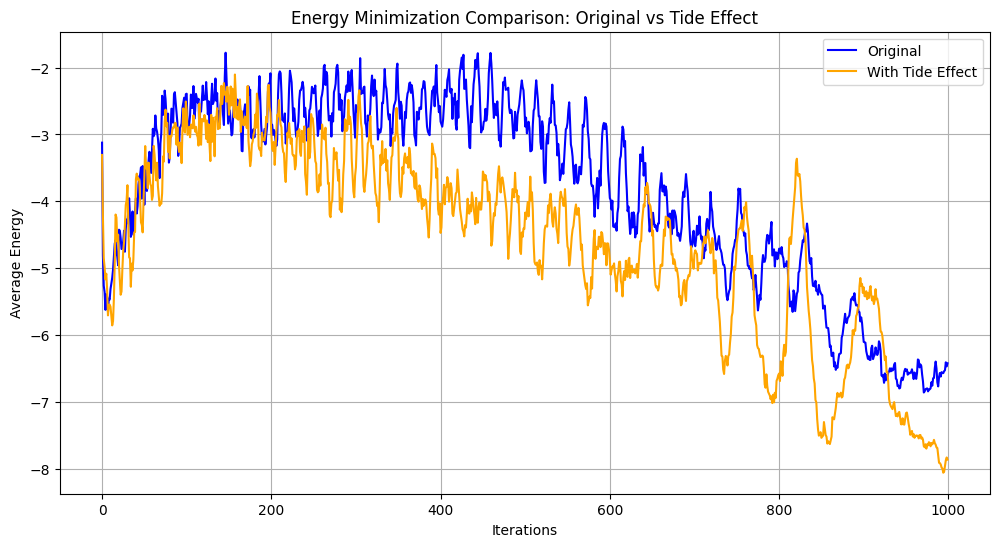

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Problem setup
np.random.seed(42)
adjMat = np.random.randn(10, 10)  # Random adjacency matrix
coulpingMatrix = -adjMat  # Convert problem to Ising coupling

# Parameters
numTrials = 100
numIterations = 1000
numSpins = coulpingMatrix.shape[0]
adpRate = 0.01
lamda = np.linspace(10, 0, numIterations)

# Initialization
spinVector = np.random.randint(2, size=(numSpins, numTrials)) * 2 - 1.0
xVector = np.zeros((numSpins, numTrials))
momentum = np.zeros((numSpins, numTrials))
isingHamil = np.zeros(numTrials)
isingHamilHistory_original = np.zeros((numIterations, numTrials))

# Original simulation
for ii in np.arange(numIterations):
    delHising = np.dot(-coulpingMatrix, spinVector)
    delHinit = xVector
    delHsystem = delHising + lamda[ii] * delHinit
    momentum = (1 - adpRate) * momentum - adpRate * delHsystem
    momentum = np.clip(momentum, -1, 1)
    xVector += momentum
    xVector = np.clip(xVector, -1, 1)
    spinVector = np.sign(xVector)
    for tt in np.arange(numTrials):
        isingHamil[tt] = -0.5 * np.dot(spinVector[:, tt].T, (coulpingMatrix @ spinVector[:, tt]))
    isingHamilHistory_original[ii] = isingHamil

# Reset for tidal effect simulation
spinVector = np.random.randint(2, size=(numSpins, numTrials)) * 2 - 1.0
xVector = np.zeros((numSpins, numTrials))
momentum = np.zeros((numSpins, numTrials))
isingHamilHistory_tide = np.zeros((numIterations, numTrials))

# Simulation with tidal effect
for ii in np.arange(numIterations):
    delHising = np.dot(-coulpingMatrix, spinVector)
    delHinit = xVector
    tide_amplitude = 2.0 * (1 - ii / numIterations)
    tide_effect = tide_amplitude * np.sin(2 * np.pi * ii / 100)
    delHsystem = delHising + lamda[ii] * delHinit + tide_effect
    momentum = (1 - adpRate) * momentum - adpRate * delHsystem
    momentum = np.clip(momentum, -1, 1)
    xVector += momentum
    xVector = np.clip(xVector, -1, 1)
    spinVector = np.sign(xVector)
    for tt in np.arange(numTrials):
        isingHamil[tt] = -0.5 * np.dot(spinVector[:, tt].T, (coulpingMatrix @ spinVector[:, tt]))
    isingHamilHistory_tide[ii] = isingHamil

# Plot comparison
plt.figure(figsize=(12, 6))

mean_original = isingHamilHistory_original.mean(axis=1)
mean_tide = isingHamilHistory_tide.mean(axis=1)

plt.plot(mean_original, label="Original", color='blue')
plt.plot(mean_tide, label="With Tide Effect", color='orange')
plt.title("Energy Minimization Comparison: Original vs Tide Effect")
plt.xlabel("Iterations")
plt.ylabel("Average Energy")
plt.legend()
plt.grid()
plt.show()


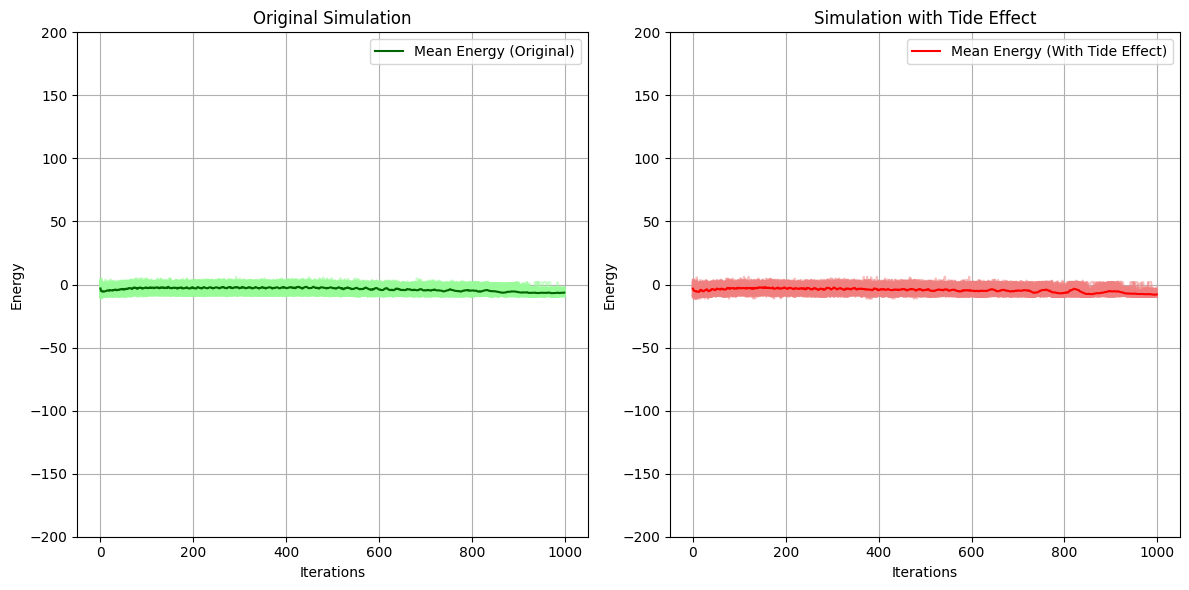

In [ ]:
# Plot comparison for individual trials and mean energy
plt.figure(figsize=(12, 6))

# Original simulation
plt.subplot(1, 2, 1)
for tt in np.arange(numTrials):
    plt.plot(isingHamilHistory_original[:, tt], color='palegreen', alpha=0.5)
plt.plot(np.mean(isingHamilHistory_original, axis=1), color='darkgreen', label="Mean Energy (Original)")
plt.title("Original Simulation")
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.ylim(-200, 200)
plt.legend()
plt.grid()

# Tide effect simulation
plt.subplot(1, 2, 2)
for tt in np.arange(numTrials):
    plt.plot(isingHamilHistory_tide[:, tt], color='lightcoral', alpha=0.5)
plt.plot(np.mean(isingHamilHistory_tide, axis=1), color='red', label="Mean Energy (With Tide Effect)")
plt.title("Simulation with Tide Effect")
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.ylim(-200, 200)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


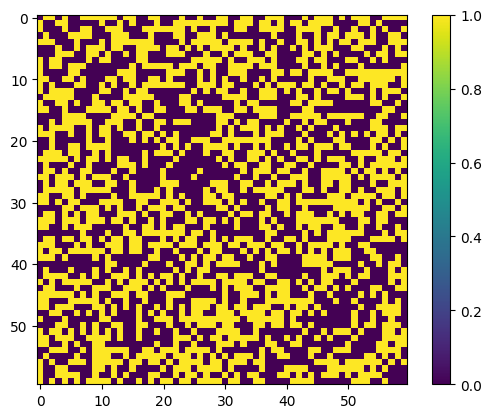

In [20]:
import numpy as np
import matplotlib.pyplot as plt
adjMat = np.load("adjMat.npy")     # load example Max-Cut problem
plt.imshow(adjMat)
plt.colorbar()

In [21]:
coulpingMatrix = - adjMat   # Covert problem to Ising coupling
# parameter chosing
numTrials = 100
numIterations = 1000   # predefined number of iterations
numSpins = coulpingMatrix.shape[0]  # number of spins (Problem size N)
adpRate = 0.01    # learning rate/step size
lamda = np.linspace(10,0,numIterations)     # coefficient of initial Hamiltonian
# initilization
spinVector = np.random.randint(2,size=(numSpins,numTrials))*2-1.0   # randomly initialize spin configurations
xVector = np.zeros((numSpins,numTrials))    # zero initialize classical "superposition"
momentum = np.zeros((numSpins,numTrials))    # zero initialize momentum
isingHamil = np.zeros(numTrials)    # Ising Hamiltonian
isingHamilHistory = np.zeros((numIterations,numTrials))     # Ising Hamiltonian History

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Problem setup
np.random.seed(42)
#adjMat = np.random.randn(10, 10)  # Random adjacency matrix
#coulpingMatrix = -adjMat  # Convert problem to Ising coupling

coulpingMatrix = - adjMat   # Covert problem to Ising coupling
# parameter chosing
numTrials = 100
numIterations = 1000   # predefined number of iterations
numSpins = coulpingMatrix.shape[0]  # number of spins (Problem size N)
adpRate = 0.01    # learning rate/step size
lamda = np.linspace(10,0,numIterations)     # coefficient of initial Hamiltonian
# initilization
spinVector = np.random.randint(2,size=(numSpins,numTrials))*2-1.0   # randomly initialize spin configurations
xVector = np.zeros((numSpins,numTrials))    # zero initialize classical "superposition"
momentum = np.zeros((numSpins,numTrials))    # zero initialize momentum
isingHamil = np.zeros(numTrials)    # Ising Hamiltonian
isingHamilHistory = np.zeros((numIterations,numTrials))     # Ising Hamiltonian History
isingHamilHistory_original = np.zeros((numIterations,numTrials))     # Ising Hamiltonian History

# # Parameters
# numTrials = 100
# numIterations = 1000
# numSpins = coulpingMatrix.shape[0]
# adpRate = 0.01
# lamda = np.linspace(10, 0, numIterations)

# # Initialization
# spinVector = np.random.randint(2, size=(numSpins, numTrials)) * 2 - 1.0
# xVector = np.zeros((numSpins, numTrials))
# momentum = np.zeros((numSpins, numTrials))
# isingHamil = np.zeros(numTrials)
# isingHamilHistory_original = np.zeros((numIterations, numTrials))

# Original simulation
for ii in np.arange(numIterations):
    delHising = np.dot(-coulpingMatrix, spinVector)
    delHinit = xVector
    delHsystem = delHising + lamda[ii] * delHinit
    momentum = (1 - adpRate) * momentum - adpRate * delHsystem
    momentum = np.clip(momentum, -1, 1)
    xVector += momentum
    xVector = np.clip(xVector, -1, 1)
    spinVector = np.sign(xVector)
    for tt in np.arange(numTrials):
        isingHamil[tt] = -0.5 * np.dot(spinVector[:, tt].T, (coulpingMatrix @ spinVector[:, tt]))
    isingHamilHistory_original[ii] = isingHamil

# Reset for tidal effect simulation
spinVector = np.random.randint(2, size=(numSpins, numTrials)) * 2 - 1.0
xVector = np.zeros((numSpins, numTrials))
momentum = np.zeros((numSpins, numTrials))
isingHamilHistory_tide = np.zeros((numIterations, numTrials))

# Simulation with tidal effect
# for ii in np.arange(numIterations):
#     delHising = np.dot(-coulpingMatrix, spinVector)
#     delHinit = xVector
#     tide_amplitude = 2.0 * (1 - ii / numIterations)
#     tide_effect = tide_amplitude * np.sin(2 * np.pi * ii / 100)
#     delHsystem = delHising + lamda[ii] * delHinit + tide_effect
#     momentum = (1 - adpRate) * momentum - adpRate * delHsystem
#     momentum = np.clip(momentum, -1, 1)
#     xVector += momentum
#     xVector = np.clip(xVector, -1, 1)
#     spinVector = np.sign(xVector)
#     for tt in np.arange(numTrials):
#         isingHamil[tt] = -0.5 * np.dot(spinVector[:, tt].T, (coulpingMatrix @ spinVector[:, tt]))
#     isingHamilHistory_tide[ii] = isingHamil
# Adjusted Simulation with Enhanced Tidal Effect
# for ii in np.arange(numIterations):
#     delHising = np.dot(-coulpingMatrix, spinVector)
#     delHinit = xVector
#     tide_amplitude = 5.0 * (1 - ii / numIterations)  # Increased amplitude
#     tide_effect = tide_amplitude * np.sin(2 * np.pi * ii / 50)  # Higher frequency tide
#     random_effect = np.random.randn(*spinVector.shape) * tide_amplitude  # Enhanced randomness
#     delHsystem = delHising + lamda[ii] * delHinit + tide_effect + random_effect  # Include randomness
#     momentum = (1 - adpRate) * momentum - adpRate * delHsystem
#     momentum = np.clip(momentum, -1, 1)
#     xVector += momentum
#     xVector = np.clip(xVector, -1, 1)
#     spinVector = np.sign(xVector)
#     for tt in np.arange(numTrials):
#         isingHamil[tt] = -0.5 * np.dot(spinVector[:, tt].T, (coulpingMatrix @ spinVector[:, tt]))
#     isingHamilHistory_tide[ii] = isingHamil

for ii in np.arange(numIterations):
    # 計算 Ising 貢獻
    delHising = np.dot(-coulpingMatrix, spinVector)
    delHinit = xVector

    # 模擬潮汐效應：周期性與衰減結合
    tide_amplitude = 5.0 * np.exp(-ii / (numIterations / 5))  # 衰減幅度
    tide_effect = tide_amplitude * np.sin(2 * np.pi * ii / 100)  # 週期性潮汐
    if (ii % 200) > 100:  # 模擬月亮升起後的緩慢衰減
        tide_effect *= np.cos((ii % 100) * np.pi / 100)

    # 隨機擾動
    random_effect = np.random.randn(*spinVector.shape) * tide_amplitude  # 隨機擾動隨潮汐幅度變化

    # 總能量貢獻
    delHsystem = delHising + lamda[ii] * delHinit + tide_effect + random_effect

    # 動量更新
    momentum = (1 - adpRate) * momentum - adpRate * delHsystem
    momentum = np.clip(momentum, -1, 1)  # 裁剪動量範圍

    # 狀態更新
    xVector += momentum
    xVector = np.clip(xVector, -1, 1)  # 裁剪連續值範圍
    spinVector = np.sign(xVector)  # 更新自旋狀態

    # 計算能量
    for tt in np.arange(numTrials):
        isingHamil[tt] = -0.5 * np.dot(spinVector[:, tt].T, (coulpingMatrix @ spinVector[:, tt]))

    # 記錄能量歷史
    isingHamilHistory_tide[ii] = isingHamil





In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Problem setup
np.random.seed(42)
#adjMat = np.random.randn(10, 10)  # Random adjacency matrix
#coulpingMatrix = -adjMat  # Convert problem to Ising coupling

coulpingMatrix = - adjMat   # Covert problem to Ising coupling
# parameter chosing
numTrials = 100
numIterations = 1000   # predefined number of iterations
numSpins = coulpingMatrix.shape[0]  # number of spins (Problem size N)
adpRate = 0.01    # learning rate/step size
lamda = np.linspace(10,0,numIterations)     # coefficient of initial Hamiltonian
# initilization
spinVector = np.random.randint(2,size=(numSpins,numTrials))*2-1.0   # randomly initialize spin configurations
xVector = np.zeros((numSpins,numTrials))    # zero initialize classical "superposition"
momentum = np.zeros((numSpins,numTrials))    # zero initialize momentum
isingHamil = np.zeros(numTrials)    # Ising Hamiltonian
isingHamilHistory = np.zeros((numIterations,numTrials))     # Ising Hamiltonian History



# Original simulation
for ii in np.arange(numIterations):
    delHising = np.dot(-coulpingMatrix, spinVector)
    delHinit = xVector
    delHsystem = delHising + lamda[ii] * delHinit
    momentum = (1 - adpRate) * momentum - adpRate * delHsystem
    momentum = np.clip(momentum, -1, 1)
    xVector += momentum
    xVector = np.clip(xVector, -1, 1)
    spinVector = np.sign(xVector)
    for tt in np.arange(numTrials):
        isingHamil[tt] = -0.5 * np.dot(spinVector[:, tt].T, (coulpingMatrix @ spinVector[:, tt]))
    isingHamilHistory_original[ii] = isingHamil

# Reset for tidal effect simulation
spinVector = np.random.randint(2, size=(numSpins, numTrials)) * 2 - 1.0
xVector = np.zeros((numSpins, numTrials))
momentum = np.zeros((numSpins, numTrials))
isingHamilHistory_tide = np.zeros((numIterations, numTrials))

for ii in np.arange(numIterations):
    # 計算 Ising 貢獻
    delHising = np.dot(-coulpingMatrix, spinVector)
    delHinit = xVector

    # 模擬潮汐效應：周期性與衰減結合
    tide_amplitude = np.random.uniform(1.0, 10.0) * np.exp(-ii / (numIterations / 5))

    tide_effect = tide_amplitude * np.sin(2 * np.pi * ii / 100)  # 週期性潮汐
    if (ii % 200) > 100:  # 模擬月亮升起後的緩慢衰減
        tide_effect *= np.cos((ii % 100) * np.pi / 100)

    # 隨機擾動
    random_effect = np.random.randn(*spinVector.shape) * tide_amplitude  # 隨機擾動隨潮汐幅度變化

    # 總能量貢獻
    delHsystem = delHising + lamda[ii] * delHinit + tide_effect + random_effect

    # 動量更新
    momentum =  momentum - adpRate * delHsystem
    momentum = np.clip(momentum, -1, 1)  # 裁剪動量範圍

    # 狀態更新
    xVector += momentum
    xVector = np.clip(xVector, -1, 1)  # 裁剪連續值範圍
    spinVector = np.sign(xVector)  # 更新自旋狀態

    # 計算能量
    for tt in np.arange(numTrials):
        isingHamil[tt] = -0.5 * np.dot(spinVector[:, tt].T, (coulpingMatrix @ spinVector[:, tt]))

    # 記錄能量歷史
    isingHamilHistory_tide[ii] = isingHamil



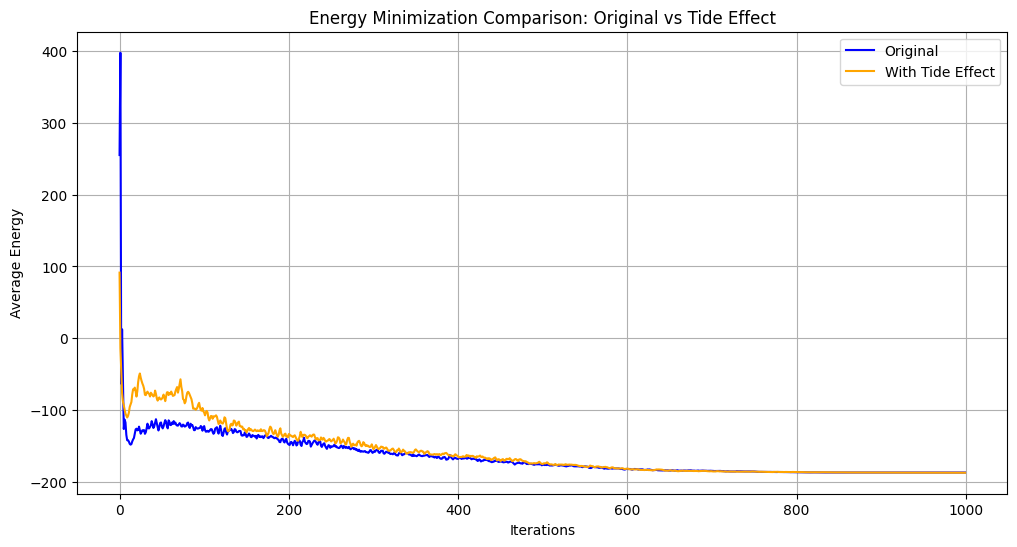

Minimum Energy (Original): -187.4
Minimum Energy (Tide Effect): -187.7


In [27]:
# Plot comparison
plt.figure(figsize=(12, 6))

mean_original = isingHamilHistory_original.mean(axis=1)
mean_tide = isingHamilHistory_tide.mean(axis=1)

plt.plot(mean_original, label="Original", color='blue')
plt.plot(mean_tide, label="With Tide Effect", color='orange')
plt.title("Energy Minimization Comparison: Original vs Tide Effect")
plt.xlabel("Iterations")
plt.ylabel("Average Energy")
plt.legend()
plt.grid()
plt.show()

# Compare minimum values
min_original = mean_original.min()
min_tide = mean_tide.min()

print(f"Minimum Energy (Original): {min_original}")
print(f"Minimum Energy (Tide Effect): {min_tide}")

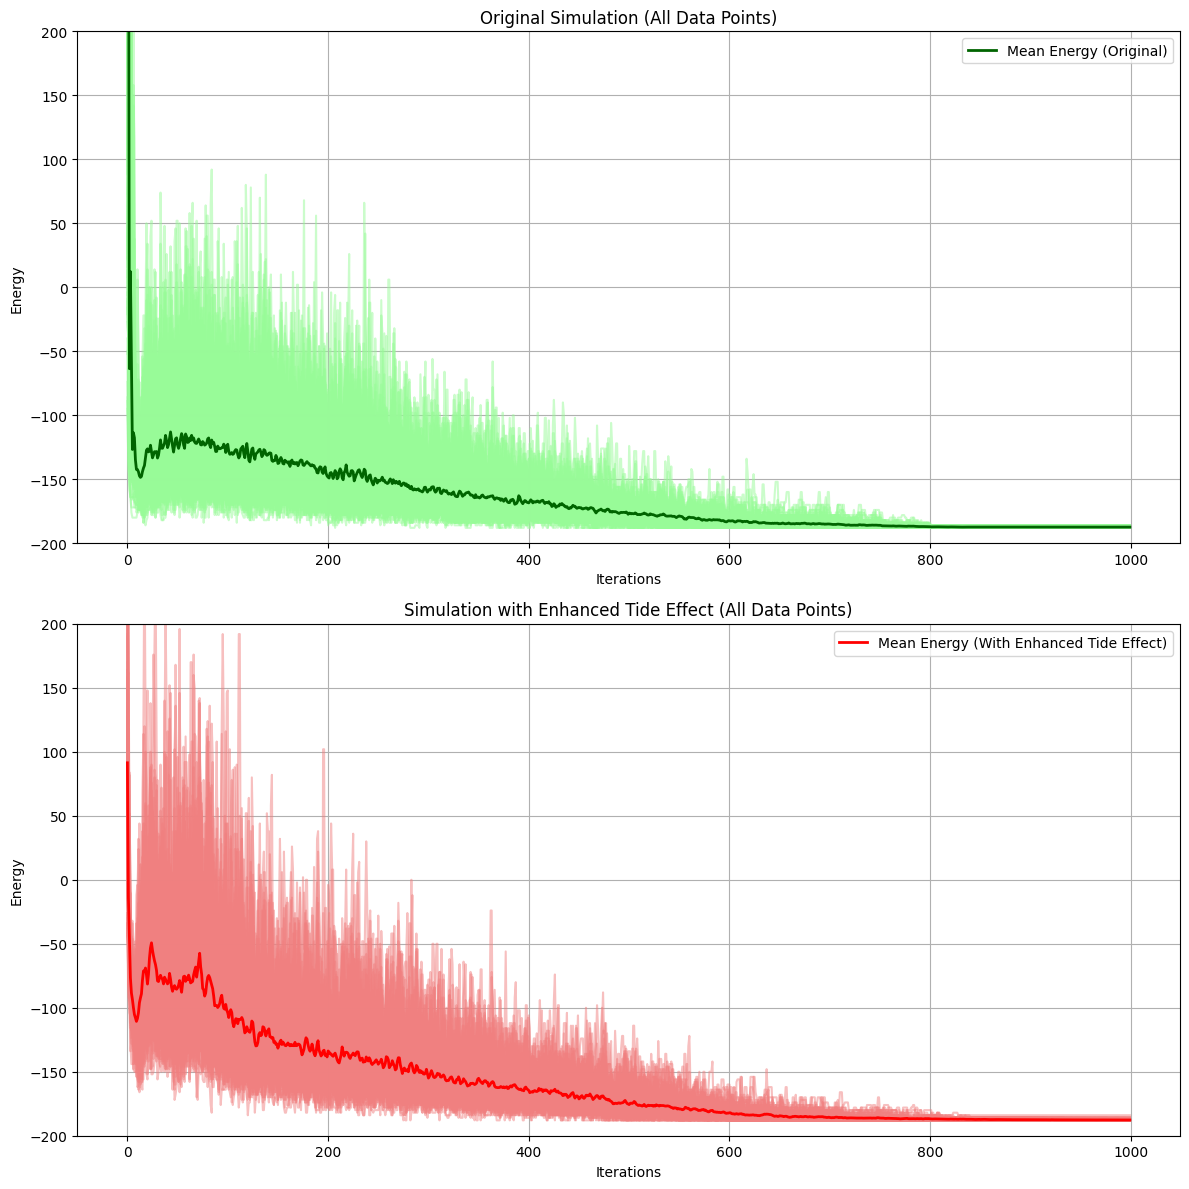

In [28]:
# Plot comparison for individual trials with all data points included
plt.figure(figsize=(12, 12))

# Original simulation
plt.subplot(2, 1, 1)
for tt in np.arange(numTrials):
    plt.plot(isingHamilHistory_original[:, tt], color='palegreen', alpha=0.5)
plt.plot(np.mean(isingHamilHistory_original, axis=1), color='darkgreen', label="Mean Energy (Original)", linewidth=2)
plt.title("Original Simulation (All Data Points)")
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.ylim(-200, 200)
plt.legend()
plt.grid()

# Enhanced tide effect simulation
plt.subplot(2, 1, 2)
for tt in np.arange(numTrials):
    plt.plot(isingHamilHistory_tide[:, tt], color='lightcoral', alpha=0.5)
plt.plot(np.mean(isingHamilHistory_tide, axis=1), color='red', label="Mean Energy (With Enhanced Tide Effect)", linewidth=2)
plt.title("Simulation with Enhanced Tide Effect (All Data Points)")
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.ylim(-200, 200)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [29]:
successProbabilty = np.sum(isingHamilHistory_original[-1,:] == -188) / numTrials        # compare the result to a known optimal solution to get success probability
print(successProbabilty)

successProbabilty2 = np.sum(isingHamilHistory_tide[-1,:] == -188) / numTrials        # compare the result to a known optimal solution to get success probability
print(successProbabilty2)

0.7
0.86


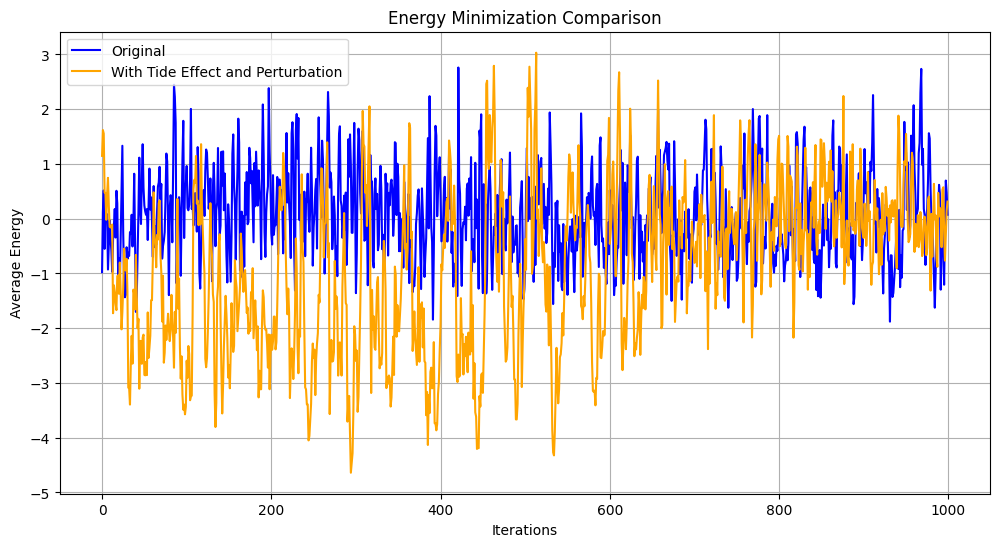

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Problem setup
numIterations = 1000
numTrials = 10
L = 10  # Number of spins
np.random.seed(42)

# Coupling matrix and initial setup
coulpingMatrix = np.random.randn(L, L)
xVector = np.random.uniform(-1, 1, (L, numTrials))
spinVector = np.sign(xVector)
lamda = np.linspace(0.1, 1.0, numIterations)  # Linearly varying lambda
adpRate = 0.1
momentum = np.zeros((L, numTrials))
isingHamil = np.zeros(numTrials)
isingHamilHistory_original = np.zeros((numIterations, numTrials))
isingHamilHistory_tide = np.zeros((numIterations, numTrials))

# Original run (without tide or perturbation)
for ii in np.arange(numIterations):
    delHising = np.dot(-coulpingMatrix, spinVector)
    delHinit = xVector
    delHsystem = delHising + lamda[ii] * delHinit
    momentum = (1 - adpRate) * momentum - adpRate * delHsystem
    momentum = np.clip(momentum, -1, 1)
    xVector += momentum
    xVector = np.clip(xVector, -1, 1)
    spinVector = np.sign(xVector)
    for tt in np.arange(numTrials):
        isingHamil[tt] = -0.5 * np.dot(spinVector[:, tt].T, (coulpingMatrix @ spinVector[:, tt]))
    isingHamilHistory_original[ii] = isingHamil

# Reset parameters for tide simulation
xVector = np.random.uniform(-1, 1, (L, numTrials))
spinVector = np.sign(xVector)
momentum = np.zeros((L, numTrials))

# Simulation with tide and random perturbation
for ii in np.arange(numIterations):
    delHising = np.dot(-coulpingMatrix, spinVector)
    delHinit = xVector
    tide_amplitude = 2.0 * (1 - ii / numIterations)
    tide_effect = tide_amplitude * np.sin(2 * np.pi * ii / 100)
    random_effect = np.random.randn(L, numTrials) * 0.1
    delHsystem = delHising + lamda[ii] * delHinit + tide_effect + random_effect
    momentum = (1 - adpRate) * momentum - adpRate * delHsystem
    momentum = np.clip(momentum, -1, 1)
    xVector += momentum
    xVector = np.clip(xVector, -1, 1)
    spinVector = np.sign(xVector)
    for tt in np.arange(numTrials):
        isingHamil[tt] = -0.5 * np.dot(spinVector[:, tt].T, (coulpingMatrix @ spinVector[:, tt]))
    isingHamilHistory_tide[ii] = isingHamil

# Plot comparison
plt.figure(figsize=(12, 6))

# Average energies over trials
mean_original = isingHamilHistory_original.mean(axis=1)
mean_tide = isingHamilHistory_tide.mean(axis=1)

plt.plot(mean_original, label="Original", color='blue')
plt.plot(mean_tide, label="With Tide Effect and Perturbation", color='orange')
plt.title("Energy Minimization Comparison")
plt.xlabel("Iterations")
plt.ylabel("Average Energy")
plt.legend()
plt.grid()
plt.show()

